# NN Analysis

In this notebook we will train a NN algorithm with our different datasets, and analyze the results!<br>
We will perform an accuracy comparison between a train-test split and a 10-fold cross validation. We will then deeply analyze the performance of these models through the use of performance metrics.

.Here is a brief explanation of what metrics we will use, and why we use them.

-Accuracy: measures the proportion of correct predictions out of the total predictions made (used in balanced datasets). The higher the better

-Precision: measures how many of the predicted positive instances are actually correct (important when the cost of a false positive is high). The higher the better. 

-Recall: measures how many actual positives were correctly identified (important when missing a positive case is costly). The higher the better. (IN OUR CASE RECALL IS VERY IMPORTANT! CLASSIFYING AS NON MALIGNOUS WHEN IT IS MALIGNOUS IS VERY BAD!)

-F1 Score: calculates the harmonic mean of Precision and Recall, balancing the two metrics (used in imbalanced datasets). The higher the better.

-Confusion Matrix: shows the count of True Positives, True Negatives, False Positives and False Negatives (helps understanding missclassifications).

-ROC AUC: measures the ability of a model to distinguish between classes, plotting the True Positive Rate (Recall) against the False Positive Rate. A score close to 1 indicates good performance, and close to 0.5 or lower indicates poor performance.

-Learning Curves: show how well a model is learning as more training data is provided, plotting the training and testing performance over time. It indicates underfitting when both accuracies are low, overfitting when the training accuracy is high but the testing accuracy is low, and a good fit when bot accuracies are high and close to eachother (converging).

# 

# 0. Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# define the parameters from parameter hypertuning for MLPClassifier
hidden_layer_nodes = 60
hidden_layer_activation = "relu"
learning_rate = 0.01

# 1. Organized By Slices

## &emsp;&emsp;&emsp;1.1  Non Normalized Dataset

In [3]:
#reading the dataset
df_by_slices = pd.read_csv("final_by_slices.csv")

#separate the features from the label
X = df_by_slices.drop("malignancy", axis=1)
y = df_by_slices["malignancy"]

#-----------

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

# perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation Accuracy: 0.7568 ± 0.0151


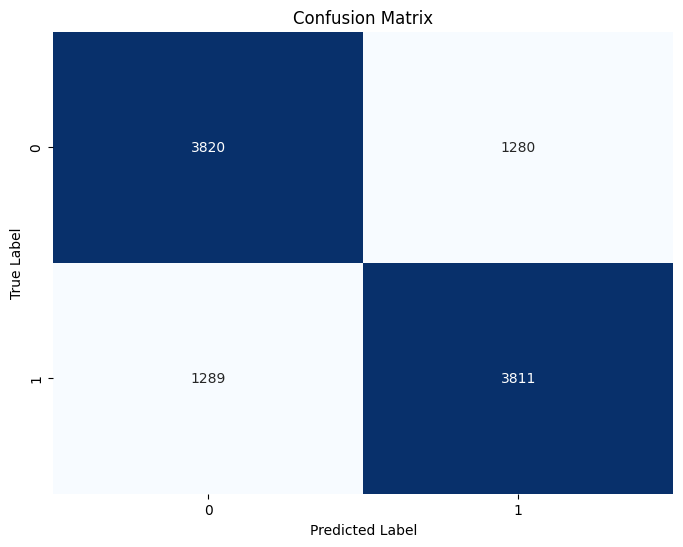

In [4]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


# print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.7481372549019608
Accuracy 10-fold cross validation =  0.7568067226890756

Test Accuracy: 0.7481
Precision: 0.7486
Recall: 0.7473
F1-score: 0.7479
ROC AUC: 0.8101


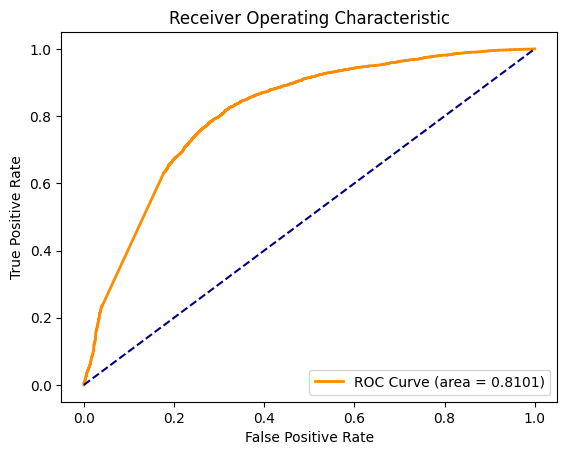

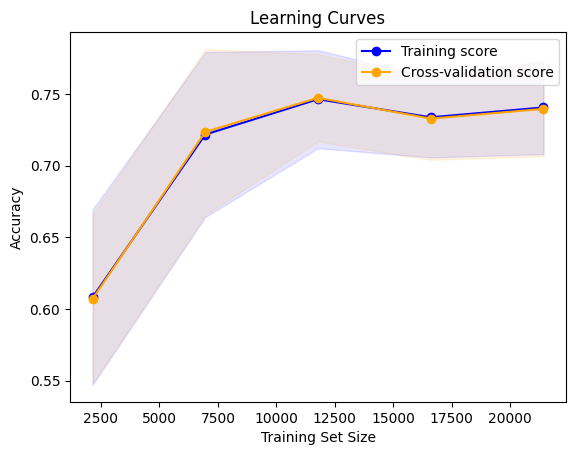

In [5]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#print prediction, recall, F1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#print ROC AUC curve
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#print learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

## &emsp;&emsp;&emsp;1.2 Normalized Dataset

In [6]:
#reading the dataset
df_by_slices_normalized = pd.read_csv("final_by_slices_normalized.csv")

#separate the features from the label
X = df_by_slices_normalized.drop("malignancy", axis=1)
y = df_by_slices_normalized["malignancy"]

#-----------

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Cross-Validation Accuracy: 0.8773 ± 0.0092


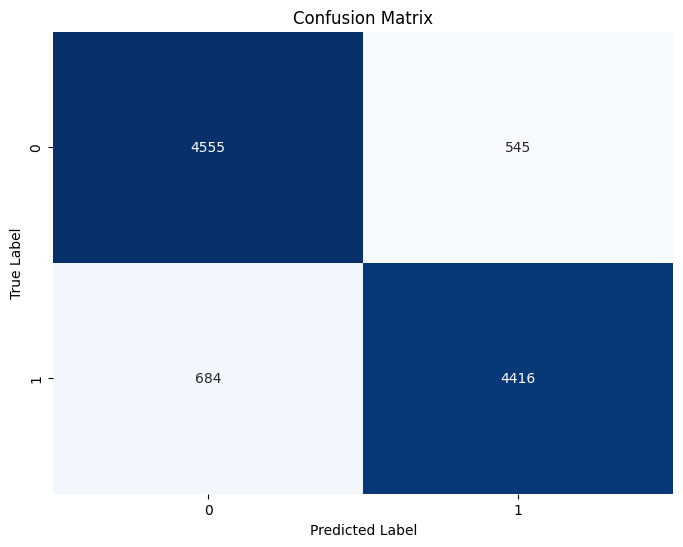

In [7]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]  


# Print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# Learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.8795098039215686
Accuracy 10-fold cross validation =  0.8773109243697478

Test Accuracy: 0.8795
Precision: 0.8901
Recall: 0.8659
F1-score: 0.8778
ROC AUC: 0.9497


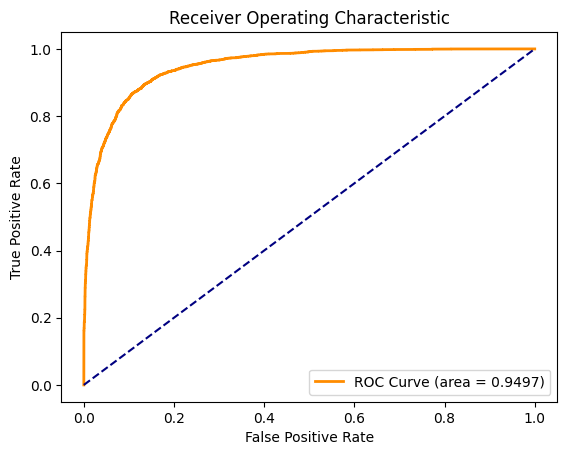

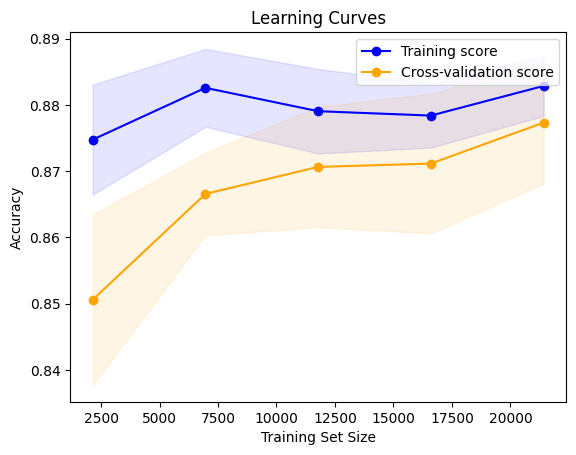

In [8]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#print prediction, recall, F1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#print ROC AUC curve
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#print learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

# 2. Organized By Annotations

## &emsp;&emsp;&emsp;2.1 Non Normalized Dataset

In [9]:
#reading the dataset
df_by_annotations = pd.read_csv("final_by_annotations.csv")

#separate the features from the label
X = df_by_annotations.drop("malignancy", axis=1)
y = df_by_annotations["malignancy"]

#---------

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

#pPerform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Cross-Validation Accuracy: 0.6244 ± 0.1044


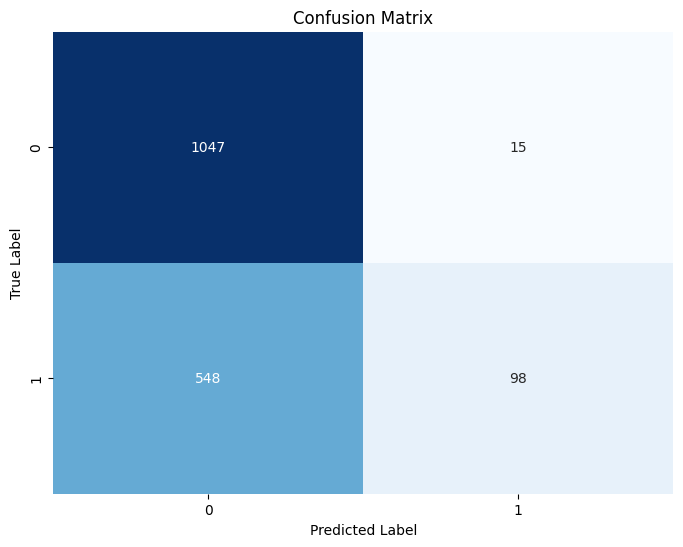

In [10]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]


# print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.6703747072599532
Accuracy 10-fold cross validation =  0.624440498230501

Test Accuracy: 0.6704
Precision: 0.8673
Recall: 0.1517
F1-score: 0.2582
ROC AUC: 0.5733


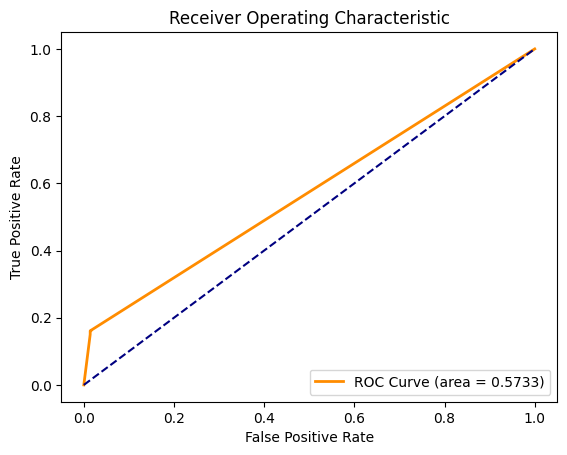

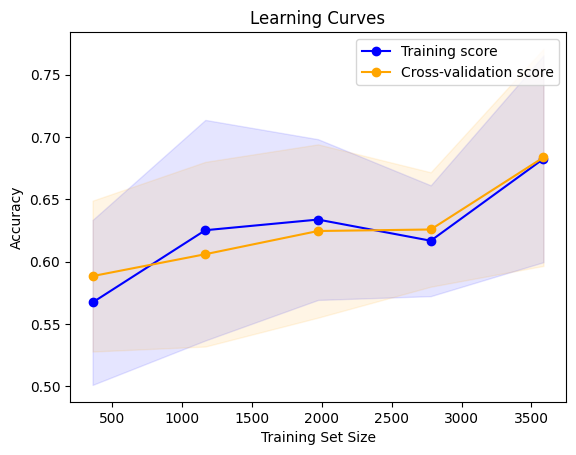

In [11]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#accuracy, precision, recall and f1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

## 

## &emsp;&emsp;&emsp;2.2 Normalized Dataset

In [12]:
#reading the dataset
df_by_annotations_normalized = pd.read_csv("final_by_annotations_normalized.csv")

#separate the features from the label
X = df_by_annotations_normalized.drop("malignancy", axis=1)
y = df_by_annotations_normalized["malignancy"]


#-----------

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")


Cross-Validation Accuracy: 0.8612 ± 0.0113


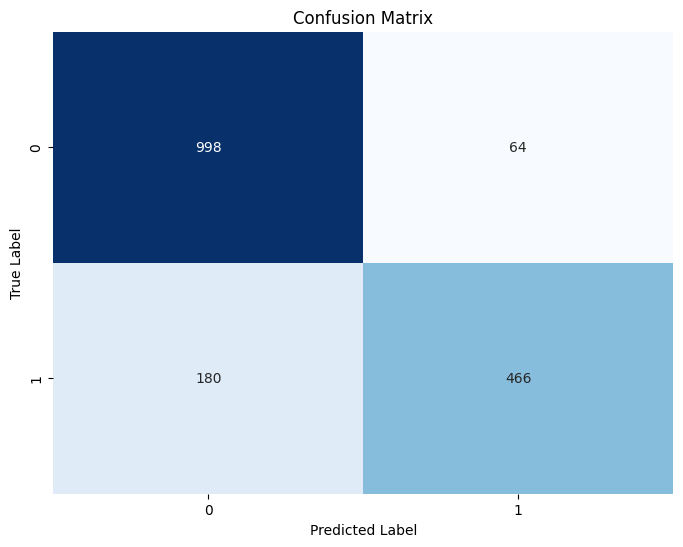

In [13]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]


# print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.8571428571428571
Accuracy 10-fold cross validation =  0.8612297074344152

Test Accuracy: 0.8571
Precision: 0.8792
Recall: 0.7214
F1-score: 0.7925
ROC AUC: 0.9316


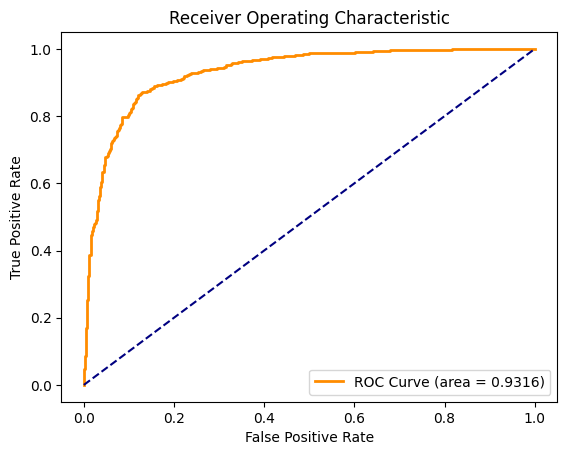

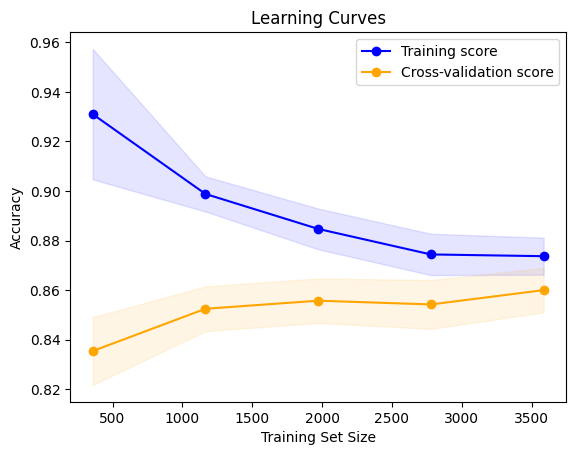

In [14]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#print prediction, recall, F1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#print ROC AUC curve
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#print learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

# 

# 3. Organized By Nodules

## &emsp;&emsp;&emsp;3.1 Non Normalized Dataset

In [15]:
#reading the dataset
df_by_nodules = pd.read_csv("final_by_nodules.csv")

#separate the features from the label
X = df_by_nodules.drop("malignancy", axis=1)
y = df_by_nodules["malignancy"]


#-----------

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation Accuracy: 0.6218 ± 0.1012


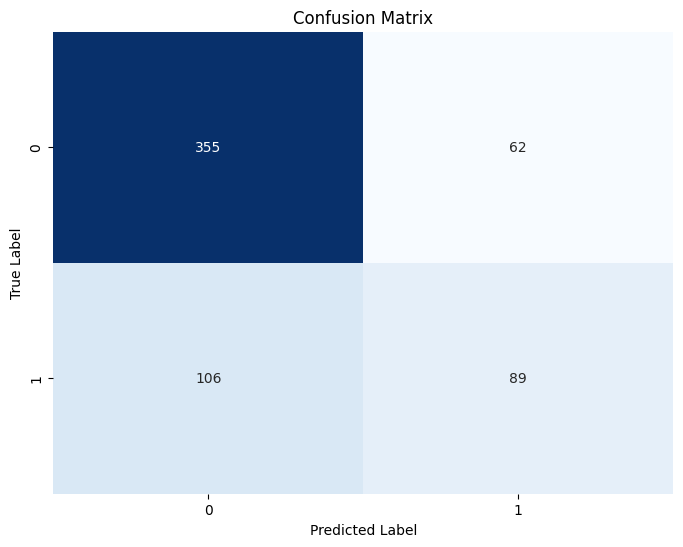

In [16]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1] 


# print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.7254901960784313
Accuracy 10-fold cross validation =  0.6217718900817493

Test Accuracy: 0.7255
Precision: 0.5894
Recall: 0.4564
F1-score: 0.5145
ROC AUC: 0.6556


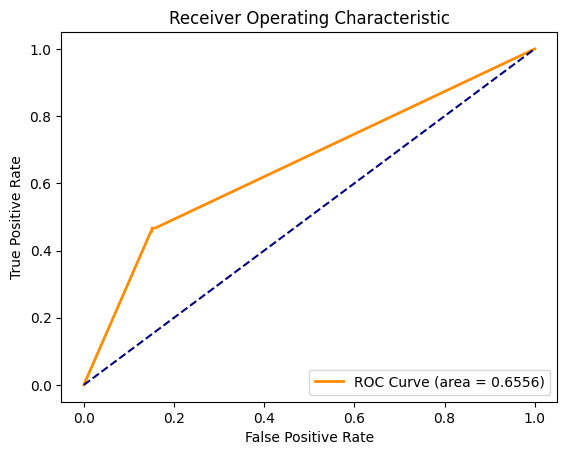

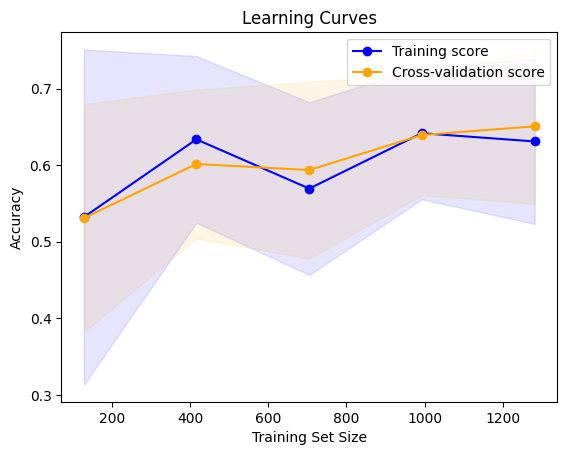

In [17]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#print prediction, recall, F1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#print ROC AUC curve
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#print learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

## 

## &emsp;&emsp;&emsp;3.2 Normalized Dataset

In [18]:
#reading the dataset
df_by_nodules_normalized = pd.read_csv("final_by_nodules_normalized.csv")

#separate the features from the label
X = df_by_nodules_normalized.drop("malignancy", axis=1)
y = df_by_nodules_normalized["malignancy"]

#-----------

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

#create the model
model = MLPClassifier(
    hidden_layer_sizes=(hidden_layer_nodes),
    activation=hidden_layer_activation,
    learning_rate_init=learning_rate,
    max_iter=1000,  
    random_state=42
)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

#-----------

# Perform cross-validation
cv = KFold(n_splits=10, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')
print(f"Cross-Validation Accuracy: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")

Cross-Validation Accuracy: 0.8793 ± 0.0370


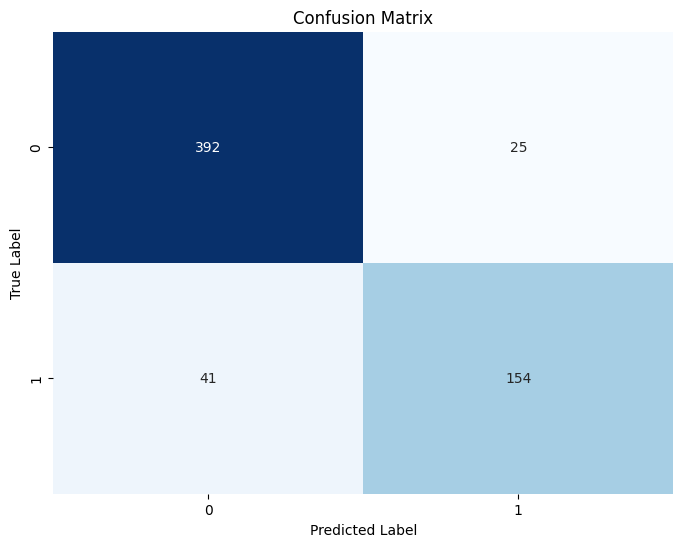

In [19]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)


# predict on the test set
y_pred = model.predict(X_test)
#probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test)[:, 1]


# print accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')


# plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


# ROC AUC and ROC curve
roc_auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)


# learning curves
train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

Accuracy train/test split =  0.8921568627450981
Accuracy 10-fold cross validation =  0.8793312321481336

Test Accuracy: 0.8922
Precision: 0.8603
Recall: 0.7897
F1-score: 0.8235
ROC AUC: 0.9409


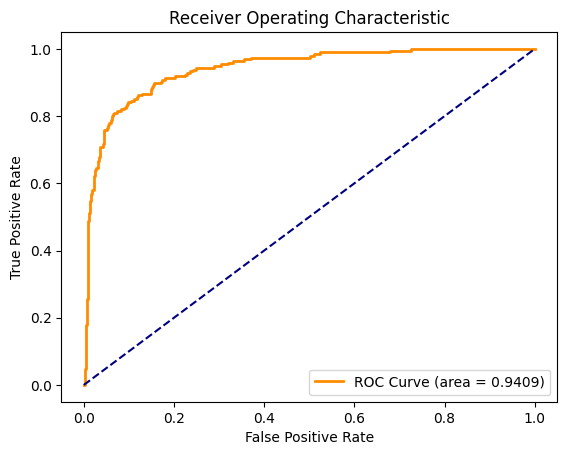

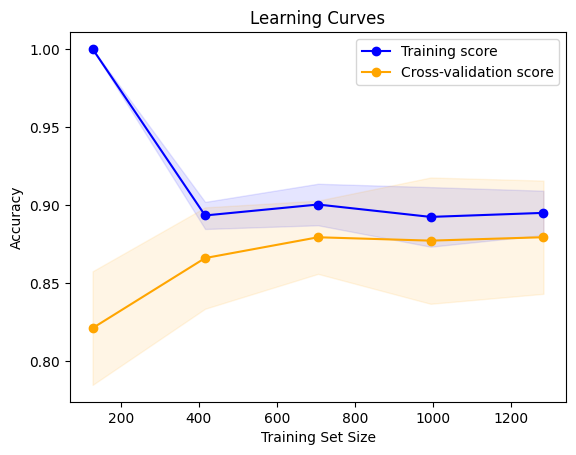

In [20]:
#print accuracies for train-test split and 10-fold cross validation
print("Accuracy train/test split = ", accuracy)
print("Accuracy 10-fold cross validation = ", cv_scores.mean())
print()

#print prediction, recall, F1-score
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

#print ROC AUC curve
print(f"ROC AUC: {roc_auc:.4f}")
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()


#print learning curve
plt.figure()
plt.plot(train_sizes, train_mean, 'o-', color="blue", label="Training score")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.plot(train_sizes, test_mean, 'o-', color="orange", label="Cross-validation score")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="orange")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()

# 

# 4. Comparison